In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [5]:
results1 = np.load('results\\result_dict_base_caps_E400_R1.npy')
results1 = results1.item()

results2 = np.load('results\\result_dict_base_caps_E400_R2.npy')
results2 = results2.item()

results3 = np.load('results\\result_dict_base_caps_E400_Feb13.npy')
results3 = results3.item()

results4 = np.load('results\\result_dict_conv+2_Feb20.npy')
results4 = results4.item()

results5 = np.load('results\\result_dict_resid_Feb21.npy')
results5 = results5.item()



#ground_truth = torch.load('results\\ground_truth_Feb13_Recon_0_1_linear+1.pt')
#ground_truth = ground_truth.contiguous()
#reconstruction = torch.load('results\\reconstruction_Feb13_Recon_0_1.pt')
#reconstruction1 = torch.load('results\\reconstruction_Feb13_Recon_0_1_linear+1.pt')

In [20]:
def plot_result(y, x, ylabel, xlabel):
    plt.plot(np.asarray(range(x))+1, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plot_results(r):
    for i in ['test_accuracy','train_accuracy','test_loss','train_loss']:
        plot_result(r[i], len(r['test_accuracy']), i, 'Number of Epochs')


%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

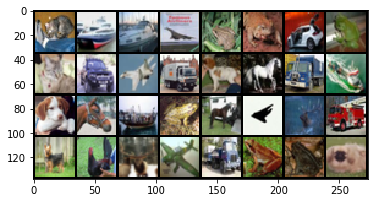

In [62]:
show(make_grid(ground_truth, nrow = 8))

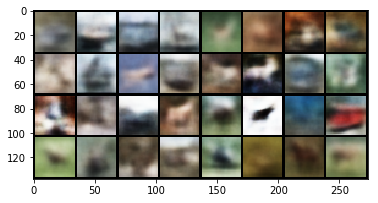

In [63]:
show(make_grid(reconstruction, nrow = 8))

In [18]:
plot_results(results)

NameError: name 'results' is not defined

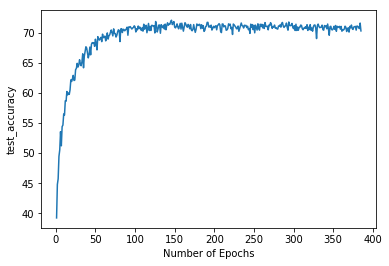

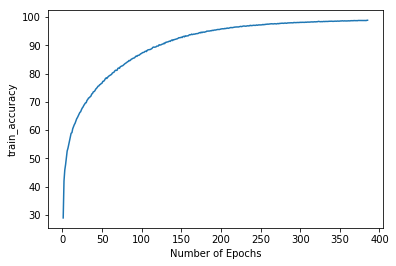

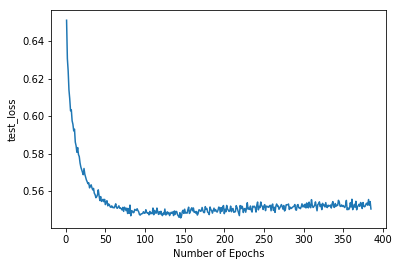

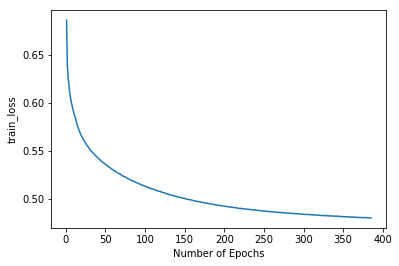

In [21]:
plot_results(results5)

In [16]:
results['train_accuracy'][-1]

71.188

In [26]:
results1['train_accuracy'][100]

86.42

In [27]:
results['test_accuracy'][-1]

67.15

In [9]:
max(results['test_accuracy'])

71.94

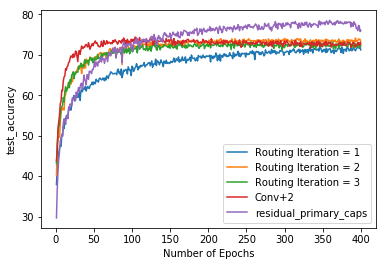

In [13]:
plt.plot(np.asarray(range(results1['num_epochs']))+1, results1['test_accuracy'])
plt.plot(np.asarray(range(results2['num_epochs']))+1, results2['test_accuracy'])
plt.plot(np.asarray(range(results3['num_epochs']))+1, results3['test_accuracy'])
plt.plot(np.asarray(range(results4['num_epochs']))+1, results4['test_accuracy'])
plt.plot(np.asarray(range(len(results5['test_accuracy'])))+1, results5['test_accuracy'])
plt.legend(['Routing Iteration = 1', 'Routing Iteration = 2', 'Routing Iteration = 3', 'Conv+2', 'residual_primary_caps'])
plt.ylabel('test_accuracy')
plt.xlabel('Number of Epochs')
plt.savefig('results\\Images\\test_accuracy_comparison.png')

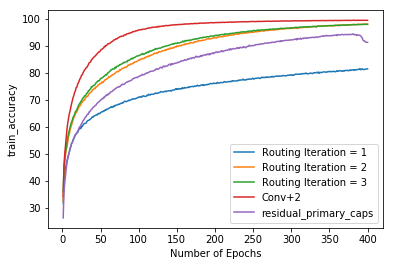

In [12]:
plt.plot(np.asarray(range(results1['num_epochs']))+1, results1['train_accuracy'])
plt.plot(np.asarray(range(results2['num_epochs']))+1, results2['train_accuracy'])
plt.plot(np.asarray(range(results3['num_epochs']))+1, results3['train_accuracy'])
plt.plot(np.asarray(range(results4['num_epochs']))+1, results4['train_accuracy'])
plt.plot(np.asarray(range(results5['num_epochs']))+1, results5['train_accuracy'])
plt.legend(['Routing Iteration = 1', 'Routing Iteration = 2', 'Routing Iteration = 3', 'Conv+2', 'residual_primary_caps'])
plt.ylabel('train_accuracy')
plt.xlabel('Number of Epochs')
plt.savefig('results\\Images\\train_accuracy.png')

In [10]:
print(min(results5['train_loss']))
print(min(results5['test_loss']))
print(max(results5['train_accuracy']))
print(max(results5['test_accuracy']))



0.4767410209067573
0.5403536650509884
99.502
74.35000000000001


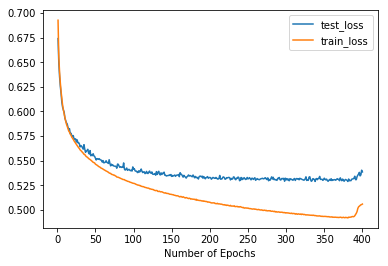

In [14]:
plt.plot(np.asarray(range(results5['num_epochs']))+1, results5['test_loss'])
plt.plot(np.asarray(range(results5['num_epochs']))+1, results5['train_loss'])
plt.legend(['test_loss', 'train_loss'])
plt.xlabel('Number of Epochs')
plt.show()

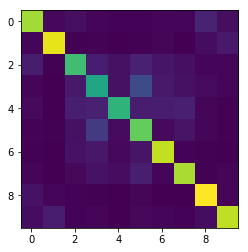

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(results5['confusion_matrix'])